In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# #1 Data Sets Loading

In [2]:
trainData = pd.read_csv('/kaggle/input/titanic/train.csv')
trainData
testData = pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
trainData.info()
# A total of 891 rows and 11 features, with only age and cabin having missing values or nulls
# 4 Categorical features, name,sex,ticket,cabin and embarked
# Name and ticket are useless for us, we can say both are like IDs so can drop Name, Id and ticket from data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## #2 Visualize Train Dataset, Explore It And Perform Cleaning and Encoding

In [5]:
# Time for Feature encoding
# We will converte the feature sex,cabin and embarked to numerical 
trainDataCopy = trainData.copy()
trainDataCopy['Sex'] = trainDataCopy['Sex'].apply(lambda x: 1 if x == 'male' else 0)

testDataCopy = testData.copy()
testDataCopy['Sex'] = testDataCopy['Sex'].apply(lambda x: 1 if x == 'male' else 0)
#trainData.head(5)

<AxesSubplot:>

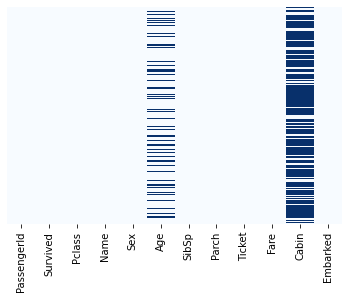

In [6]:
# let's Visualize the data with all the features using heatmap to see null or blank values in features
sns.heatmap(trainDataCopy.isnull(),yticklabels=False,cbar=False,cmap='Blues')
# this is classic way to see missing data - but one should also check using describe, as low missing counts are missed out 

In [7]:
trainDataCopy[trainDataCopy['Age'].isnull()]
# This is big count 177 out of  891 total rows
# One way to solve this is we can fill these missing values with mean of total
# another is too remove the data rows with missing values - but if we do so the dataset will shrink in good amount
# so let's try first with mean values for age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S


In [8]:
# filing Missing age values with mean
trainDataCopy['Age'].fillna(trainDataCopy['Age'].mean(),inplace=True)

testDataCopy['Age'].fillna(testDataCopy['Age'].mean(),inplace=True)

<AxesSubplot:>

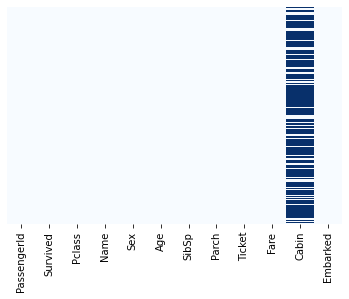

In [9]:
sns.heatmap(trainDataCopy.isnull(),yticklabels=False,cbar=False,cmap='Blues')
# We are left with Cabin now
# Cabin can have values like S 

In [10]:
trainDataCopy['Cabin'].unique()
# for our dataset a cabin candidate falls in luxery and can have impact on survival 
# but Cabin # are not that important, so let's modify this feature

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
trainDataCopy['Cabin'].fillna(0,inplace=True)
trainDataCopy['Cabin'] = trainDataCopy['Cabin'].apply(lambda x: 0 if x == 0 else 1)
trainDataCopy['Cabin'].unique()

testDataCopy['Cabin'].fillna(0,inplace=True)
testDataCopy['Cabin'] = testDataCopy['Cabin'].apply(lambda x: 0 if x == 0 else 1)

<AxesSubplot:>

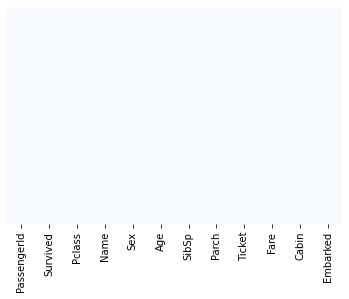

In [12]:
sns.heatmap(trainDataCopy.isnull(),yticklabels=False,cbar=False,cmap='Blues')
# We got rid of all the missing values

In [13]:
trainDataCopy.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


'\nVariable\tDefinition\tKey\n\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\t# of siblings / spouses aboard the Titanic\t\nparch\t# of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n'

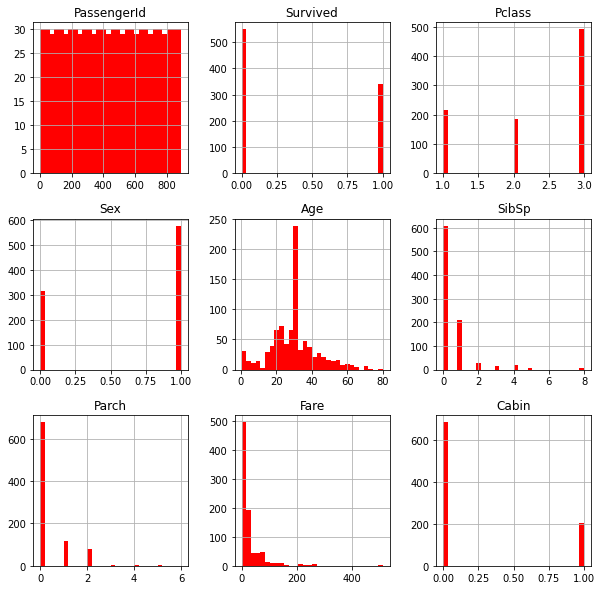

In [14]:
# Let's visualize the features with histogram 
trainDataCopy.hist(bins=30,figsize=(10,10),color='r')
# As per histogram  we find that most of the feature data varies and is not having common traits in it

'''
Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
'''


In [15]:
# Let's check the count how many survived and how many died
passengerSurvived = trainDataCopy[trainDataCopy['Survived']==1]
passengerDied = trainDataCopy[trainDataCopy['Survived']==0]

# survived vs died proportion in the dataset

print('Total =',len(trainDataCopy))
print('Number of survivals =',len(passengerSurvived))
print('% of survivals by total=',1.*(len(passengerSurvived)/len(trainDataCopy)*100),"%")
print('Number of deaths =',len(passengerDied))
print('% of deaths by total =',1.*(len(passengerDied)/len(trainDataCopy))*100,"%")

Total = 891
Number of survivals = 342
% of survivals by total= 38.38383838383838 %
Number of deaths = 549
% of deaths by total = 61.61616161616161 %


In [16]:
# Let's look in to the data sets for survial and death
passengerSurvived.describe()
# Age is not the factor influencing the survival or death
# Sex is influencing the survial and death - female passengers are more survived compared to male
# Parch , Fare and Pclass are influencive faetures 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,0.318713,28.549778,0.473684,0.464912,48.395408,0.397661
std,252.358840,0.0,0.863321,0.466660,13.772498,0.708688,0.771712,66.596998,0.490132
min,2.000000,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,12.475000,0.000000
50%,439.500000,1.0,2.000000,0.000000,29.699118,0.000000,0.000000,26.000000,0.000000
75%,651.500000,1.0,3.000000,1.000000,35.000000,1.000000,1.000000,57.000000,1.000000
max,890.000000,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200,1.000000


In [17]:
passengerDied.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,0.852459,30.415100,0.553734,0.329690,22.117887,0.123862
std,260.640469,0.0,0.735805,0.354968,12.457370,1.288399,0.823166,31.388207,0.329724
min,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,1.000000,23.000000,0.000000,0.000000,7.854200,0.000000
50%,455.000000,0.0,3.000000,1.000000,29.699118,0.000000,0.000000,10.500000,0.000000
75%,675.000000,0.0,3.000000,1.000000,35.000000,1.000000,0.000000,26.000000,0.000000
max,891.000000,0.0,3.000000,1.000000,74.000000,8.000000,6.000000,263.000000,1.000000


<AxesSubplot:>

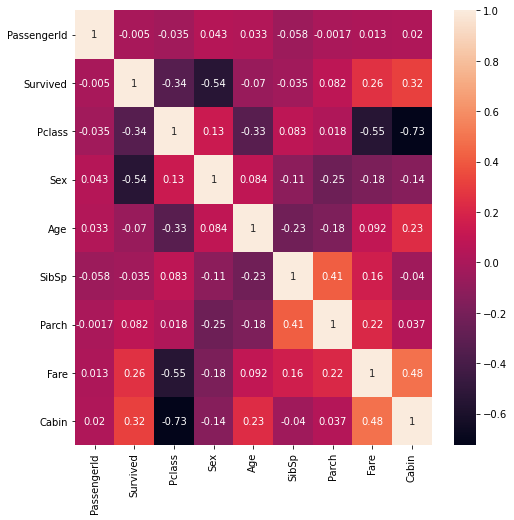

In [18]:
# Let's check the co-relation between the features
correlation = trainDataCopy.corr()
# heatmap here
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(correlation,annot=True)

# As per the correlation heatmap -> SibSp and Parch are somewhat correlated 
# this basically means if someone has child will have spouce onboard too, or if sibling then parent too
# Fare is also correlated to Cabin as a Cabin passenger is a luxry one fare is obiously high
# Another intereseting thing is Survial is also somewhat correlated to Fare and Cabin
# All other features are normal

<AxesSubplot:xlabel='SibSp', ylabel='count'>

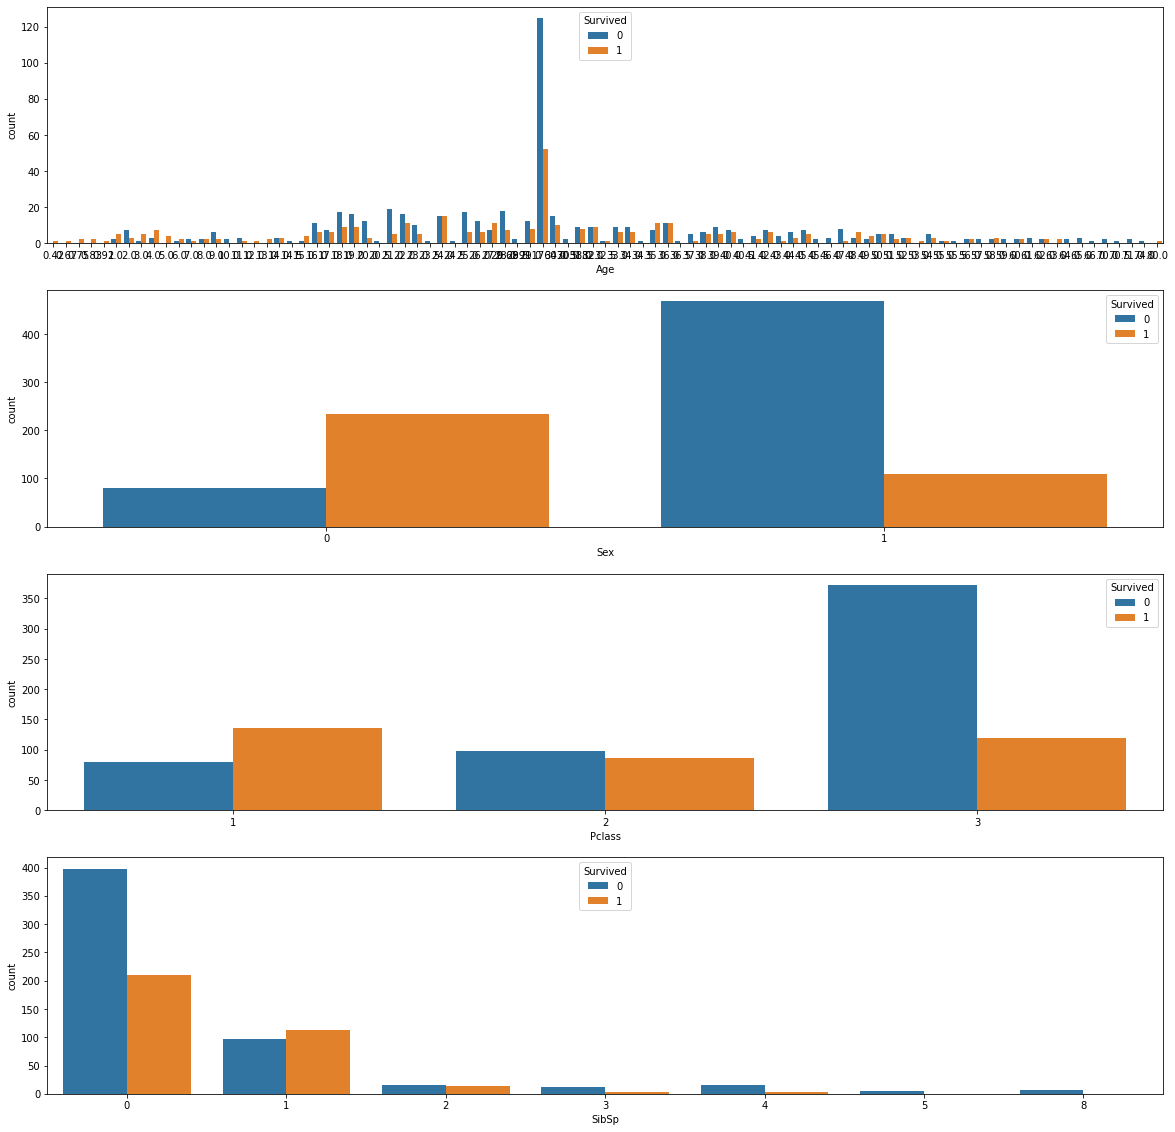

In [19]:
#let's dig deep into viualization

# Plot between age and survived

plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x='Age',hue='Survived',data=trainDataCopy)
plt.subplot(412)
sns.countplot(x='Sex',hue='Survived',data=trainDataCopy)
plt.subplot(413)
sns.countplot(x='Pclass',hue='Survived',data=trainDataCopy)
plt.subplot(414)
sns.countplot(x='SibSp',hue='Survived',data=trainDataCopy)

# Survival is quit distributed over the age but slightly higher for underage
# Female are priortized and survived more than males
# Pclass 1 and 2 has maximum survival rate
# Low SibSp 0,1 is more favourbale for survival a passenger without dependents 

<AxesSubplot:xlabel='Cabin', ylabel='count'>

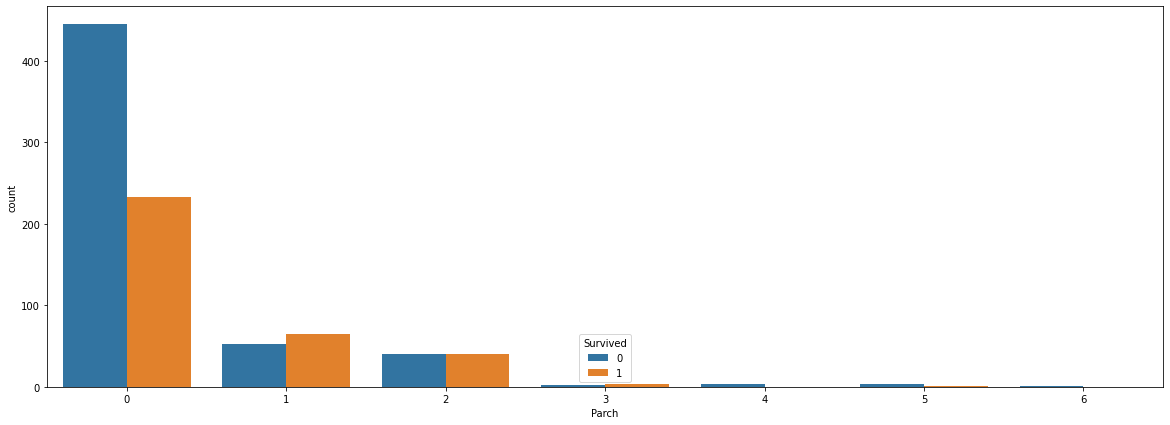

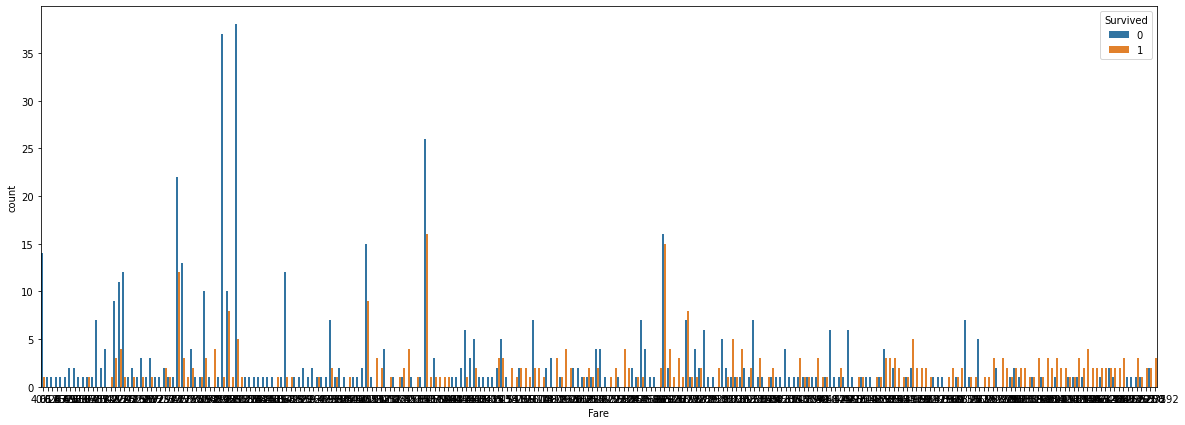

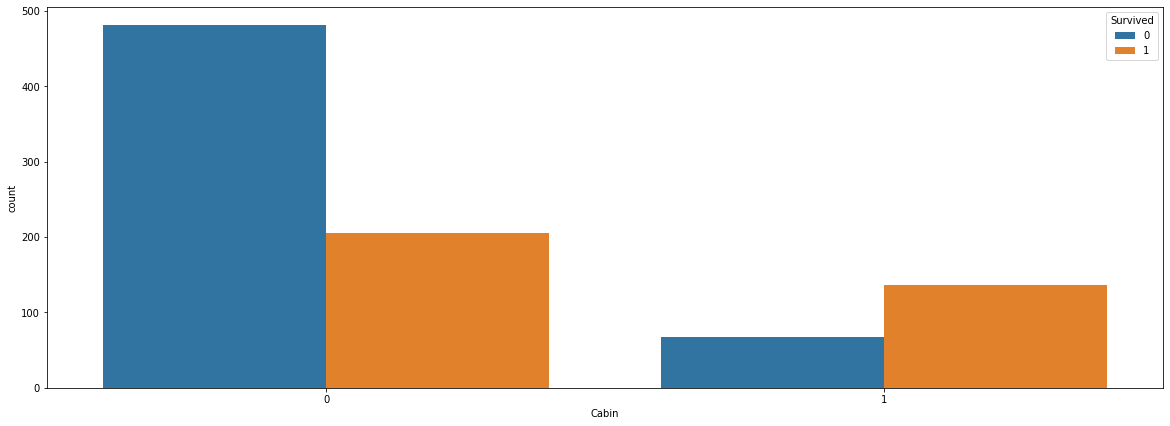

In [20]:
plt.figure(figsize=[20,7])
sns.countplot(x='Parch',hue='Survived',data=trainDataCopy)
plt.figure(figsize=[20,7])
sns.countplot(x='Fare',hue='Survived',data=trainDataCopy)
plt.figure(figsize=[20,7])
sns.countplot(x='Cabin',hue='Survived',data=trainDataCopy)

# Survived is our Taregt varible here so we can take it out too in further steps
# Low Parch 0,1 is more favourbale for survival a passenger without dependents 
# High Fare more rate of survival, a luxry travllers is favoured  
# Passenger with a Cabin is more likely to survive (fare and cabin correlated)

### #3 Data Cleaning: Encoding for Feature 'Embarked' And Scaling

In [21]:
# First drop name and ticket
trainData_cleaned= trainDataCopy.drop(['Name','Ticket','PassengerId'],axis=1)

testData_cleaned= testDataCopy.drop(['Name','Ticket','PassengerId'],axis=1)

# Encoding - another way is to use onehotencoder from sklearn library preporcessing sub library
trainData_with_dummies = pd.get_dummies(trainData_cleaned,drop_first=True)

testData_with_dummies = pd.get_dummies(testData_cleaned,drop_first=True)

trainData_with_dummies.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [22]:
testData_with_dummies

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


##### #3.2 Time for scalling

In [23]:
# As we found Cabin and Fare correlated - we can merge them later on or check and compare results without too
survivedTarget = trainData_with_dummies['Survived']
x=trainData_with_dummies.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,1,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1
887,1,0,19.000000,0,0,30.0000,1,0,1
888,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x)
#X_test = scaler.fit_transform(testData_with_dummies)
Y_train = survivedTarget


### #4 Time for Logistic Modelling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,Y_train)
#y_pred = model.predict(X_test)
testData_with_dummies.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [26]:
scaler2 = MinMaxScaler()

#testData_with_dummies.isnull().describe() Fare is missing vcalue for one row
testData_with_dummies['Fare'].fillna(testData_with_dummies['Fare'].mean(),inplace=True)

X_test = scaler2.fit_transform(testData_with_dummies)

In [27]:
testData_with_dummies.isnull().describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
count,418,418,418,418,418,418,418,418,418
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,418,418,418,418,418,418,418,418,418


In [28]:
y_pred = model.predict(X_test)
resultFrame1 = pd.DataFrame(testData['PassengerId'],columns = ['PassengerId'])
resultFrame1['Survived'] = pd.DataFrame( y_pred,columns = ['Survived'])
resultFrame1
#_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
resultFrame1.to_csv('ResultsTitanic.csv', index=False)

In [30]:
# LOL we don't have Y_test here
#print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))